Рассмотрим Optimal Brain Damage для задачи тематического моделирования. Напомним, перед нами ставится задача максимизации: 
$$
L = \sum_{d,w} n_{dw} \log \sum_{t} \phi_{wt} \theta_{td}
$$
У нас есть какое-то решение $\phi$  и $\theta$, мы хотим его сделать более разреженным, сохранив структуру и несильно испортив правдоподобие, используя метод OBD. 

Далее будем использовать стандартные обозначения ARTM ($p_{tdw}$, $n_{wt}$, $n_t$ и так далее).

### Математическая составляющая
####Зануление \Phi
 Для каждого $w$, $t$ определелим изменение правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_1 L = \sum_{d} n_{dw} \left( \log \sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} - \log \sum_{s} \phi_{ws} \theta_{sd} \right)=
\sum_{d} n_{dw} \log \frac{\sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} }{\sum_{s} \phi_{ws} \theta_{sd}}=
$$
$$
=
\sum_{d} n_{dw} \log \left( 1 - \frac{\phi_{wt} \theta_{td} }{\sum_{s} \phi_{ws} \theta_{sd}} \right) =
\sum_{d} n_{dw} \log(1 - p_{tdw}) \approx - \sum_{d} n_{dw} p_{tdw} = - n_{wt}
$$
Таким образом, если мы хотим занулять параметры модели для разреживания, кажется, что нужно занулять параметры с наименьшим значением $n_{wt}$. Однако, здесь опускается один важный момент: когда мы разреживаем модель и зануляем какой-то $\phi_{wt}$, вероятность всех остальных слов в теме увеличивается, а это увеличивает правдоподобие. Оценим эффект увеличения логарифма правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s \neq t} \phi_{us} \theta_{sd}  + \frac{\phi_{us}}{1 - \phi_{wt}} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s} \phi_{us} \theta_{sd}  + \frac{\phi_{wt}}{1 - \phi_{wt}} \phi_{us} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} \frac{\phi_{us} \theta_{td} }{\sum_{s} \phi_{us} \theta_{sd}}\right) = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
$$
$$
\approx \sum_{d, u \neq w} n_{du} \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \sum_{d, u \neq w} n_{du} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \left( n_t - n_{wt}\right) = 
$$
$$
=\frac{\phi_{wt} n_t}{1 - \phi_{wt}} \left( 1 - \frac{n_{wt}}{n_t}\right) \approx n_{wt}
$$
В первом приближении за счёт увеличения $\phi_{ut}$ при $u \neq w$ логарифм правдоподобия увеличится на $n_{wt}$. То есть суммарно в первом приближении правдоподобие не изменится. У данной проблемы есть два решения. Во-первых, мы можем честно посчитать $\Delta_1 L $ и $\Delta_2 L $ на Е-шаге и использовать их сумму (их можно эффективно быстро подсчитать, однако есть минус, что есть логарифмы, а это сказывается на скорости выполнения). Второй способ - разложить изменение не до первого члена в ряде тейлора, а до второго.
$$
\Delta_1 L = \sum_{d} n_{dw} \log(1 - p_{tdw}) \approx = - \sum_{d} n_{dw} \left( p_{tdw} + \frac12 p_{tdw}^2\right) = -n_{wt} -  \frac12 \sum_{d} n_{dw} p_{tdw}^2
$$
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
\sum_{d, u \neq w} n_{du}  \left(\frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 p_{tdu}^2\right) =
$$
$$
= \frac{\phi_{wt}}{1 - \phi_{wt}}  \left( n_t - n_{wt}\right) - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2 \approx n_{wt} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Итак,
$$
\Delta L = \Delta_1 L + \Delta_2 L \approx -  \frac12 \sum_{d} n_{dw} p_{tdw}^2 - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Это тоже можно эффективно подсчитать на E шаге, только теперь не будет логарифмов, а значит считаться будет быстрее.
####Зануление $\Theta$
Аналогично доказывается, что
$$
\Delta L = \sum_w n_{dw} \log \left( 1 - p_{tdw}\right) - n_d \log(1 - \theta_{td})
$$
###Как это можно использовать
1. Для разреживания модели на Е шаге. Можно разреживать уже имеющееся хорошее решение, можно делать по ходу итераций.
2. Когда мы хотим выбирать характерные слова из темы, можно выбирать не по $\phi_{wt}$, а по $\Delta_1 L + \Delta_2 L$.

#Питоновская реализация EM алгоритма

Полезно проделать, чтобы разобраться в numpy и в том, как эффективно писать на питоне.

In [22]:
import numpy as np
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

Нужно скачать некоторые коллекции данных и установить библиотеки (nltk, gensim)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tylorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stopwords = set(stopwords.words('english'))

## Исходники, можно пропускать

In [4]:
def trivial_p_dwt_processor(p_dwt):
    pass

def create_frac_of_max_p_dwt_processor(frac_size):
    def fun(p_dwt):
        maximums = np.max(p_dwt, axis=1)
        p_dwt[p_dwt < frac_size * maximums[:, np.newaxis]] = 0.
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
    return fun

In [5]:
def perform_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    p_dwt_processor = params.get('p_dwt_processor', lambda x: None)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
        p_dwt_processor(p_dwt)
        p_dwt *= datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            doc_p_dwt = p_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            n_dt[doc_num, :] += np.sum(doc_p_dwt, axis=0)
            n_wt[indices[doc_start:doc_finish], :] += doc_p_dwt

    return n_wt, n_dt

In [48]:
def perform_obg_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    percentile = params.get('percentile', 99)
    return_gamma = params.get('return_gamma', False)
    theta_obg = params.get('theta_obg', False)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    alpha_wt, beta_wt = np.zeros((W, T)), np.zeros((W, T))
    if theta_obg:
        alpha_dt = np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-20)
        
        alpha_dwt = np.log(1. - p_dwt) * datas[:, np.newaxis]
        beta_dwt = np.log(1. + p_dwt) * datas[:, np.newaxis]
        n_dwt = p_dwt * datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            
            doc_n_dwt = n_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_alpha_dwt = alpha_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_beta_dwt = beta_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            
            n_dt[doc_num, :] += np.sum(doc_n_dwt, axis=0)
            
            if theta_obg:
                alpha_dt[doc_num, :] += np.sum(doc_alpha_dwt, axis=0)
                
            positions = indices[doc_start:doc_finish]
            n_wt[positions, :] += doc_n_dwt
            alpha_wt[positions, :] += doc_alpha_dwt
            beta_wt[positions, :] += doc_beta_dwt
    
    beta_t = np.sum(beta_wt, axis=0)
    gamma_wt = alpha_wt + transposed_phi_matrix * (1. - transposed_phi_matrix) * (beta_t[np.newaxis, :] - beta_wt)
    bound = np.percentile(gamma_wt[gamma_wt < 0], percentile)
    n_wt[gamma_wt > bound] = 0.
    
    if theta_obg:
        gamma_dt = alpha_dt + np.sum(n_dt, axis=1)[:, np.newaxis] * np.log(1. - theta_matrix)
        bound = np.percentile(gamma_dt[gamma_dt < 0], percentile)
        n_dt[gamma_dt > bound] = 0.
    
    plt.hist(np.log(- gamma_wt[(gamma_wt < 0) & (gamma_wt > -100)]).flatten(), bins=100)
    plt.show()
    
    if return_gamma:
        return n_wt, n_dt, gamma_wt
    else:
        return n_wt, n_dt

In [7]:
def launch_em(
    freq_matrix, 
    phi_matrix,
    theta_matrix,
    logger,
    regularizations_list,
    params_list,
    iters_count=100
):
    phi_matrix = np.array(phi_matrix)
    theta_matrix = np.array(theta_matrix)
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    for it in xrange(iters_count):
        print it
        n_wt, n_dt = params_list[it]['method'](freq_matrix, docptr, phi_matrix, theta_matrix, params_list[it])
        r_wt, r_dt = regularizations_list[it](n_wt, n_dt, phi_matrix, theta_matrix)
        n_wt = np.maximum(n_wt + r_wt, 0)
        n_dt = np.maximum(n_dt + r_dt, 0)
        n_wt /= np.sum(n_wt, axis=0)
        n_dt /= np.sum(n_dt, axis=1)[:, np.newaxis]
        phi_matrix = np.transpose(n_wt)
        theta_matrix = n_dt
        logger(freq_matrix, docptr, phi_matrix, theta_matrix)
        
    return phi_matrix, theta_matrix

In [73]:
def trivial_regularization(n_wt, n_dt, phi_matrix, theta_matrix):
    return 0., 0.

def calculate_decorr(phi_matrix):
    aggr_phi = np.sum(phi_matrix, axis=1)
    return np.sum(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix))

def create_reg_decorr_naive(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        aggr_phi = np.sum(phi_matrix, axis=1)
        return - tau * np.transpose(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix)), theta_alpha
    return fun

def create_reg_lda(phi_alpha, theta_alpha):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        return phi_alpha, theta_alpha
    return fun

def create_reg_decorr_unbiased(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        tmp_phi =  n_wt / np.sum(n_wt, axis=0)
        aggr_phi = np.sum(tmp_phi, axis=0)
        return - tau * tmp_phi * (aggr_phi[np.newaxis, :] - tmp_phi), theta_alpha
    return fun

def calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, block_size=1):
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    res = 0.
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        res += np.sum(np.log(np.sum(p_dwt, axis=1) + 1e-10) * datas)
    
    return res


def create_decorr_logger(tau):
    def fun(freq_matrix, docptr, phi_matrix, theta_matrix):
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        print 'decorr', decorr
        print 'L + tau R', likelihood - tau * decorr
        non_zeros = np.sum(phi_matrix > 1e-20)
        size = phi_matrix.shape[0] * phi_matrix.shape[1]
        print 'Non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
    return fun

In [9]:
def prepare_dataset(dataset):
    # remove stopwords
    occurences = Counter()
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        for token in set(tokens):
            occurences[token] += 1
        if i % 500 == 0:
            print 'Processed: ', i, 'documents from', len(dataset.data)
    
    row, col, data = [], [], []
    token_2_num = {}
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        cnt = Counter()
        for token in tokens:
            word = token.split('/')[0]
            if word not in english_stopwords and 10 <= occurences[token] < len(dataset.data) / 2:
                if token not in token_2_num:
                    token_2_num[token] = len(token_2_num)
                cnt[token_2_num[token]] += 1
        for w, c in cnt.iteritems():
            row.append(i)
            col.append(w)
            data.append(c)
        
    num_2_token = {
        v: k
        for k, v in token_2_num.iteritems()
    }
    print 'Nonzero values:', len(data)
    return scipy.sparse.csr_matrix((data, (row, col))), token_2_num, num_2_token


### Используем коллекцию 20newsgroups

Возьмём три научные темы, очистим данные, лемматизируем слова, удаляем редкие и частые слова (реализация этого в клетке выше).

In [10]:
dataset = fetch_20newsgroups(
    subset='train',
    categories=['sci.electronics', 'sci.med', 'sci.space'],
    remove=('headers', 'footers', 'quotes')
)

In [11]:
%%time
origin_freq_matrix, token_2_num, num_2_token = prepare_dataset(dataset)

Processed:  0 documents from 1778
Processed:  500 documents from 1778
Processed:  1000 documents from 1778
Processed:  1500 documents from 1778
Nonzero values: 73610
CPU times: user 1min 20s, sys: 16 ms, total: 1min 20s
Wall time: 1min 20s


##Оценка качества модели

Считаем следующие метрики: правдоподобие, разреженность(доля и количество ненулевых элементов в матрицах), коррелированность тем, оценка качества SVM, обученного предсказывать метку документа по полученным признакам документов.

In [71]:
def evaluate(freq_matrix, phi, theta, dataset):
    T, W = phi.shape
    D, T = theta.shape
    
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    correlation_on_topic = calculate_decorr(phi) / (T * (T - 1))
    log_likelihood = calculate_likelihood(origin_freq_matrix, docptr, phi, theta, 50)
    phi_non_zeros = np.sum(phi > 1e-20)
    phi_size = W * T
    theta_non_zeros = np.sum(theta > 1e-20)
    theta_size = D * T

    theta_copy = theta.copy()
    theta_copy[np.isnan(theta_copy)] = 1. / T
    svm_score = np.mean(cross_val_score(SVC(), theta_copy, dataset.target, 'accuracy', cv=4))

    print 'L\t\t\t\t', round(log_likelihood)
    print 'Average topic correlation\t', round(correlation_on_topic, 4)
    print 'Phi nonzeros\t\t\t', phi_non_zeros, '\tfrac\t', 1. * phi_non_zeros / phi_size
    print 'Theta nonzeros\t\t\t', theta_non_zeros, '\tfrac\t', 1. * theta_non_zeros / theta_size
    print 'SVM score\t\t\t', round(svm_score, 4)

## baseline решение - обычный PLSA

In [80]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Non zeros elements 11135    fraction 1.0
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Non zeros elements 11135    fraction 1.0
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Non zeros elements 11135    fraction 1.0
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Non zeros elements 11135    fraction 1.0
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Non zeros elements 11135    fraction 1.0
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Non zeros elements 11135    fraction 1.0
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136
Non zeros elements 11135    fraction 1.0
7
L -801923.213602
decorr 4.98984139522
L + tau R -801923.213602
Non zeros elements 11135    fraction 1.0
8
L -798961.070432
decorr 4.98930999273
L + tau R -798961.070432
Non zeros elements 11135    fraction 1.0
9
L -796239.748427
decorr 4.9887968683
L + tau R -79

In [81]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-775476.0
Average topic correlation	0.2493
Phi nonzeros			9245 	frac	0.8302649304
Theta nonzeros			7913 	frac	0.890101237345
SVM score			0.7469


За 50 итераций алгоритм не успевает сойтись так, чтобы занулить большую часть параметров. Если сделать 100 итераций то будет гораздо лучшее решение.

## Регуляризатор разреживания из ARTM

In [90]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = create_reg_lda(-0.001, -0.001)
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -820130.25584
decorr 4.99198788839
L + tau R -820130.25584
Non zeros elements 11134    fraction 1.0
1
L -818134.295257
decorr 4.99199081601
L + tau R -818134.295257
Non zeros elements 11133    fraction 1.0
2
L -816141.788428
decorr 4.99187217701
L + tau R -816141.788428
Non zeros elements 11132    fraction 1.0
3
L -813866.379989
decorr 4.99164359814
L + tau R -813866.379989
Non zeros elements 11130    fraction 1.0
4
L -811205.118961
decorr 4.99130477298
L + tau R -811205.118961
Non zeros elements 11128    fraction 1.0
5
L -808207.1852
decorr 4.99086786275
L + tau R -808207.1852
Non zeros elements 11125    fraction 1.0
6
L -805048.667926
decorr 4.99036700732
L + tau R -805048.667926
Non zeros elements 11112    fraction 1.0
7
L -801922.239379
decorr 4.98983970876
L + tau R -801922.239379
Non zeros elements 11090    fraction 1.0
8
L -798963.022602
decorr 4.98930881465
L + tau R -798963.022602
Non zeros elements 11041    fraction 0.99
9
L -796247.147996
decorr 4.98879702292
L + tau R -

In [91]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776512.0
Average topic correlation	0.2493
Phi nonzeros			7119 	frac	0.639335428828
Theta nonzeros			5013 	frac	0.563892013498
SVM score			0.7407


Получены гораздо более разреженные матрицы $\Phi$ и $\Theta$. Однако, правдоподобие получилось чуть хуже чем у PLSA, как и качество при обучении SVM (это говорит о том, что теряется больше информации при понижении размерности чем PLSA)

## OBG для разреживания матрицы Фи

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Non zeros elements 11135    fraction 1.0
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Non zeros elements 11135    fraction 1.0
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Non zeros elements 11135    fraction 1.0
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Non zeros elements 11135    fraction 1.0
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Non zeros elements 11135    fraction 1.0
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Non zeros elements 11135    fraction 1.0
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136
Non zeros elements 11135    fraction 1.0
7
L -801923.213602
decorr 4.98984139522
L + tau R -801923.213602
Non zeros elements 11135    fraction 1.0
8
L -798961.070432
decorr 4.98930999273
L + tau R -798961.070432
Non zeros elements 11135    fraction 1.0
9
L -796239.748427
decorr 4.9887968683
L + tau R -79

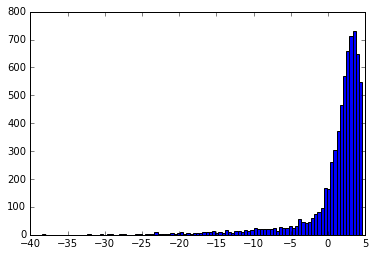

L -776207.035116
decorr 4.98601379838
L + tau R -776207.035116
Non zeros elements 7621    fraction 0.68
41


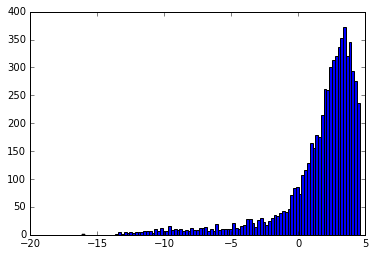

L -776106.619166
decorr 4.98600725865
L + tau R -776106.619166
Non zeros elements 7419    fraction 0.67
42


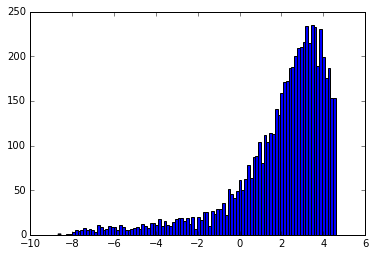

L -776011.027389
decorr 4.98599751525
L + tau R -776011.027389
Non zeros elements 7220    fraction 0.65
43


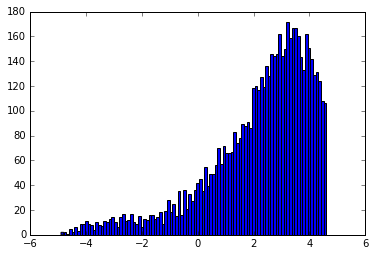

L -775920.538899
decorr 4.98598218465
L + tau R -775920.538899
Non zeros elements 7034    fraction 0.63
44


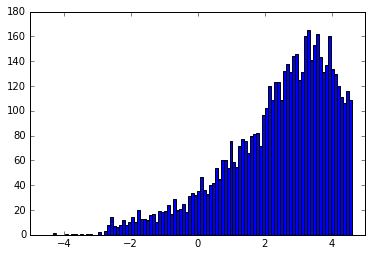

L -775840.308846
decorr 4.98595468994
L + tau R -775840.308846
Non zeros elements 6858    fraction 0.62
45


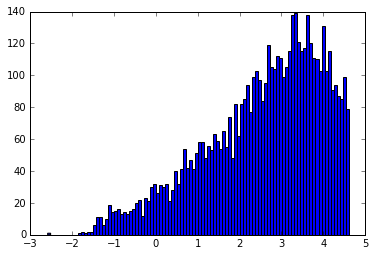

L -775782.103288
decorr 4.98591282321
L + tau R -775782.103288
Non zeros elements 6685    fraction 0.6
46


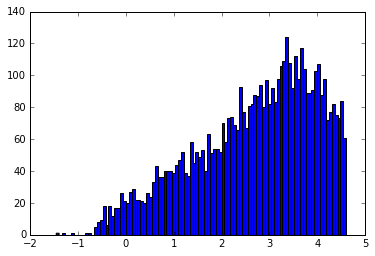

L -775772.032362
decorr 4.98586340527
L + tau R -775772.032362
Non zeros elements 6517    fraction 0.59
47


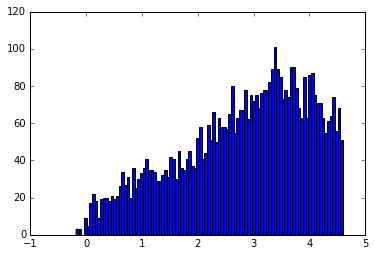

L -775827.659903
decorr 4.98580220304
L + tau R -775827.659903
Non zeros elements 6353    fraction 0.57
48


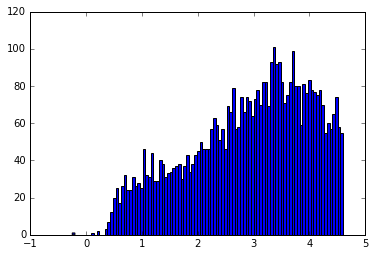

L -775901.550026
decorr 4.98572912723
L + tau R -775901.550026
Non zeros elements 6194    fraction 0.56
49


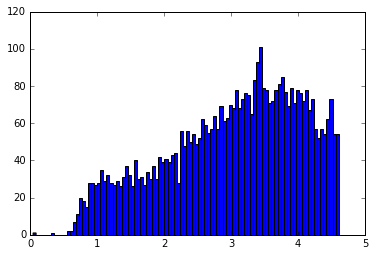

L -776020.774379
decorr 4.98563071262
L + tau R -776020.774379
Non zeros elements 6039    fraction 0.54


In [86]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 97.5
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

Начиная с 45ой итерации отображаются распределения логарифмов значений $\Delta L$ при занулении элементов матрицы $\Phi$

In [87]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776021.0
Average topic correlation	0.2493
Phi nonzeros			6039 	frac	0.542343960485
Theta nonzeros			7913 	frac	0.890101237345
SVM score			0.7497


Матрица $\Phi$ существенно более разрежена чем при PLSA (0.54 не нулей против 0.8) и при разреживающим LDA (0.54 против 0.64). Однако, правдоподобие немного лишь хуже чем при PLSA, а качество SVM даже выше. Разреживание $\Phi$ происходит отчасти за счёт уменьшения разреженности $\Theta$ (такая же как у PLSA).

## OBD для $\Phi$ и $\Theta$

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Non zeros elements 11135    fraction 1.0
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Non zeros elements 11135    fraction 1.0
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Non zeros elements 11135    fraction 1.0
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Non zeros elements 11135    fraction 1.0
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Non zeros elements 11135    fraction 1.0
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Non zeros elements 11135    fraction 1.0
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136
Non zeros elements 11135    fraction 1.0
7
L -801923.213602
decorr 4.98984139522
L + tau R -801923.213602
Non zeros elements 11135    fraction 1.0
8
L -798961.070432
decorr 4.98930999273
L + tau R -798961.070432
Non zeros elements 11135    fraction 1.0
9
L -796239.748427
decorr 4.9887968683
L + tau R -79

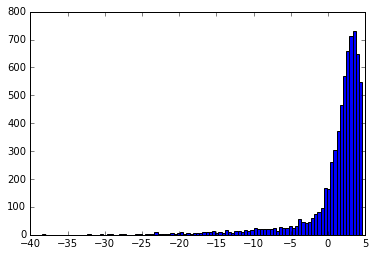

L -776207.035116
decorr 4.98601379838
L + tau R -776207.035116
Non zeros elements 7621    fraction 0.68
41


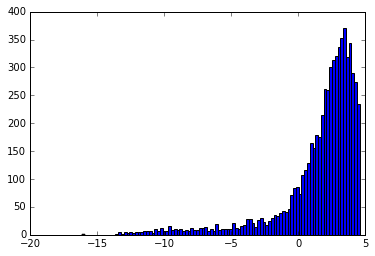

L -776106.619166
decorr 4.98600725865
L + tau R -776106.619166
Non zeros elements 7419    fraction 0.67
42


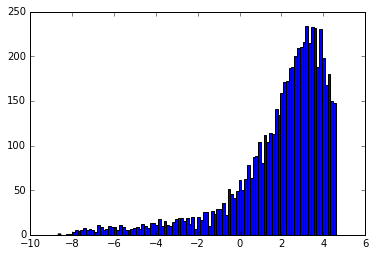

L -776011.027389
decorr 4.98599751525
L + tau R -776011.027389
Non zeros elements 7220    fraction 0.65
43


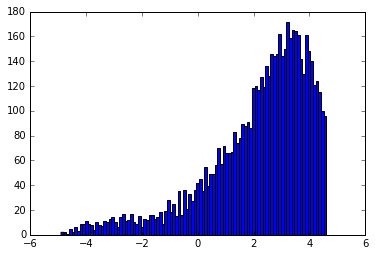

L -775920.538899
decorr 4.98598218465
L + tau R -775920.538899
Non zeros elements 7034    fraction 0.63
44


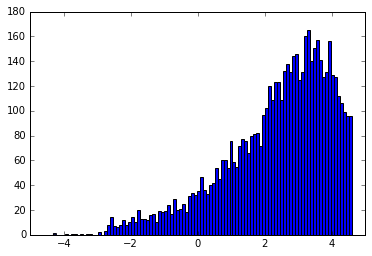

L -775840.308846
decorr 4.98595468994
L + tau R -775840.308846
Non zeros elements 6858    fraction 0.62
45


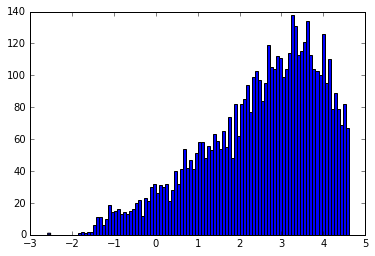

L -775782.103288
decorr 4.98591282321
L + tau R -775782.103288
Non zeros elements 6685    fraction 0.6
46


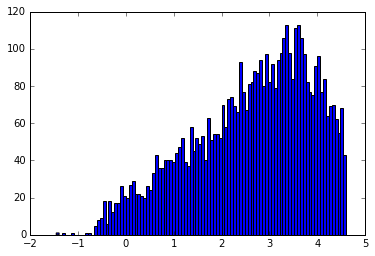

L -775772.032367
decorr 4.98586340527
L + tau R -775772.032367
Non zeros elements 6517    fraction 0.59
47


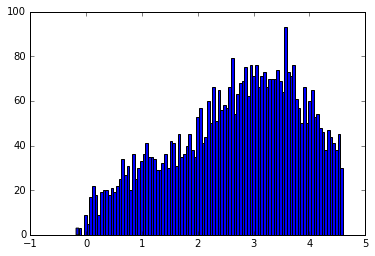

L -775827.760109
decorr 4.98580220304
L + tau R -775827.760109
Non zeros elements 6353    fraction 0.57
48


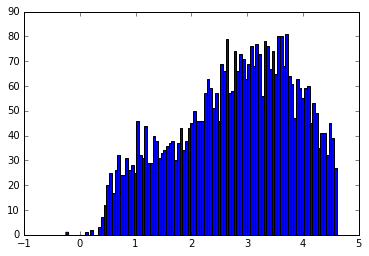

L -775911.805878
decorr 4.9857289765
L + tau R -775911.805878
Non zeros elements 6194    fraction 0.56
49


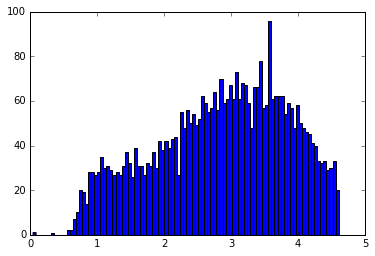

L -776032.784273
decorr 4.98563094664
L + tau R -776032.784273
Non zeros elements 6039    fraction 0.54


In [88]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 97.5,
    'theta_obg': True
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [89]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776033.0
Average topic correlation	0.2493
Phi nonzeros			6039 	frac	0.542343960485
Theta nonzeros			6237 	frac	0.70157480315
SVM score			0.7497


При тех же значениях метрик качества, количество нулей в матрице $\Theta$ уменьшилось.

Возможно зануления OBD повторяют зануления lda разреживания. Чтобы проверить это, применим obd к матрицам полученным при помощи lda регуляризатора.

## OBD для $\Phi$ и $\Theta$ поверх регуляризатора разреживания

0
L -820130.25584
decorr 4.99198788839
L + tau R -820130.25584
Non zeros elements 11134    fraction 1.0
1
L -818134.295257
decorr 4.99199081601
L + tau R -818134.295257
Non zeros elements 11133    fraction 1.0
2
L -816141.788428
decorr 4.99187217701
L + tau R -816141.788428
Non zeros elements 11132    fraction 1.0
3
L -813866.379989
decorr 4.99164359814
L + tau R -813866.379989
Non zeros elements 11130    fraction 1.0
4
L -811205.118961
decorr 4.99130477298
L + tau R -811205.118961
Non zeros elements 11128    fraction 1.0
5
L -808207.1852
decorr 4.99086786275
L + tau R -808207.1852
Non zeros elements 11125    fraction 1.0
6
L -805048.667926
decorr 4.99036700732
L + tau R -805048.667926
Non zeros elements 11112    fraction 1.0
7
L -801922.239379
decorr 4.98983970876
L + tau R -801922.239379
Non zeros elements 11090    fraction 1.0
8
L -798963.022602
decorr 4.98930881465
L + tau R -798963.022602
Non zeros elements 11041    fraction 0.99
9
L -796247.147996
decorr 4.98879702292
L + tau R -

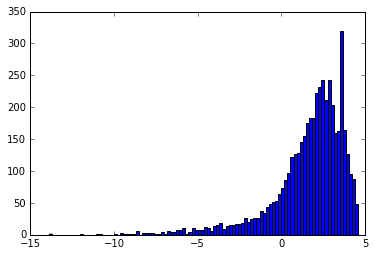

L -776957.54488
decorr 4.98600391581
L + tau R -776957.54488
Non zeros elements 7078    fraction 0.64
41


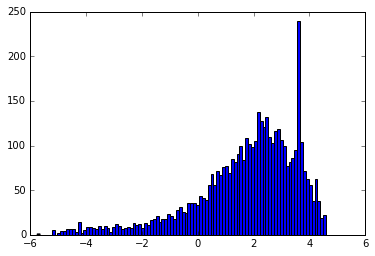

L -776884.66351
decorr 4.98599306005
L + tau R -776884.66351
Non zeros elements 6965    fraction 0.63
42


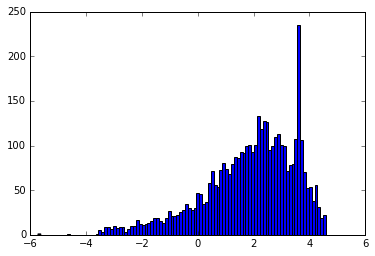

L -776818.204516
decorr 4.9859789599
L + tau R -776818.204516
Non zeros elements 6858    fraction 0.62
43


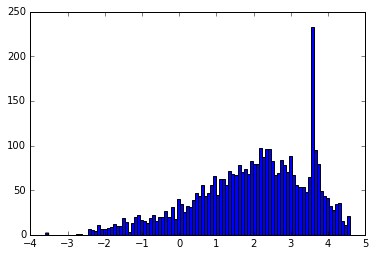

L -776758.338762
decorr 4.98595914347
L + tau R -776758.338762
Non zeros elements 6755    fraction 0.61
44


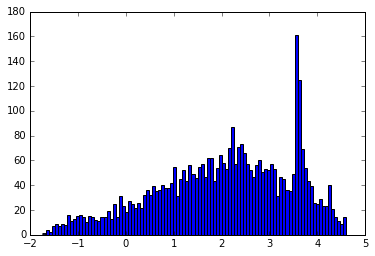

L -776709.606424
decorr 4.98593595379
L + tau R -776709.606424
Non zeros elements 6653    fraction 0.6
45


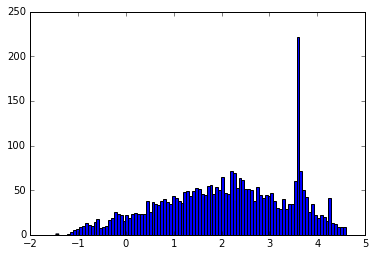

L -776668.994348
decorr 4.98590933553
L + tau R -776668.994348
Non zeros elements 6553    fraction 0.59
46


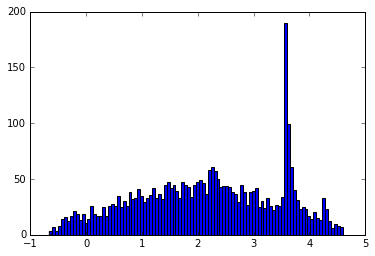

L -776643.365724
decorr 4.98587114144
L + tau R -776643.365724
Non zeros elements 6454    fraction 0.58
47


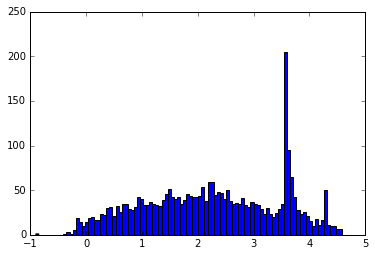

L -776650.633274
decorr 4.98583505929
L + tau R -776650.633274
Non zeros elements 6357    fraction 0.57
48


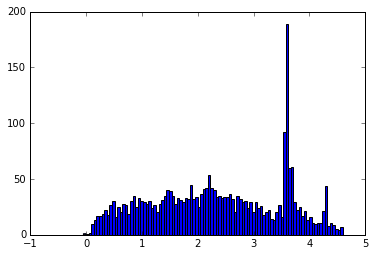

L -776676.360434
decorr 4.98579582348
L + tau R -776676.360434
Non zeros elements 6261    fraction 0.56
49


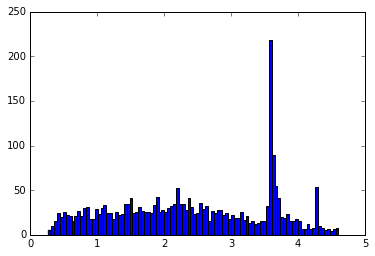

L -776702.510619
decorr 4.98574552834
L + tau R -776702.510619
Non zeros elements 6167    fraction 0.55


In [96]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 98.5,
    'theta_obg': True
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = create_reg_lda(-0.001, -0.001)
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [97]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776703.0
Average topic correlation	0.2493
Phi nonzeros			6167 	frac	0.553839245622
Theta nonzeros			4614 	frac	0.519010123735
SVM score			0.7396


При тех же значениях метрик получаем более разреженную модель.

## Ещё одно альтернативное решение: разреживать $p_{tdw}$ на Е шаге, чтобы каждое вхождение слова в документ описывалось небольшим числом тем.

In [98]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

big_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': create_frac_of_max_p_dwt_processor(0.5)
}
no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:47] = big_selection_params
params_list[47:50] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Non zeros elements 11135    fraction 1.0
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Non zeros elements 11135    fraction 1.0
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Non zeros elements 11135    fraction 1.0
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Non zeros elements 11135    fraction 1.0
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Non zeros elements 11135    fraction 1.0
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Non zeros elements 11135    fraction 1.0
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136
Non zeros elements 11135    fraction 1.0
7
L -801923.213602
decorr 4.98984139522
L + tau R -801923.213602
Non zeros elements 11135    fraction 1.0
8
L -798961.070432
decorr 4.98930999273
L + tau R -798961.070432
Non zeros elements 11135    fraction 1.0
9
L -796239.748427
decorr 4.9887968683
L + tau R -79

In [99]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776310.0
Average topic correlation	0.2493
Phi nonzeros			6641 	frac	0.596407723395
Theta nonzeros			3851 	frac	0.433183352081
SVM score			0.7272


Получается очень хорошее разреживание $\Theta$, неплохое разреживание $\Phi$. Однако SVM качество заметно падает.

In [114]:
for t in xrange(T):
    top = heapq.nlargest(20, range(W), key=lambda w: phi[t, w])
    print t
    for w in top:
        print '\t', '\t\t'.join(num_2_token[w].split('/')), phi[t, w]

0
	cx		NN 0.0107606842426
	hz		NN 0.00922447622453
	qs		NN 0.00751548419907
	ck		NN 0.0068168083012
	pl		NN 0.00670915846499
	lk		NN 0.00633106602575
	uw		NN 0.00620873617363
	tl		NN 0.00550949929327
	zd		NN 0.00532582256722
	chz		NN 0.00511557125899
	mc		NN 0.00509568928793
	mv		NN 0.00488119572777
	mw		NN 0.00486344046315
	ww		VB 0.00455398716083
	md		NN 0.00409549744592
	sk		NN 0.00393135796019
	mt		NN 0.00373785503807
	wt		NN 0.0037280096487
	pu		NN 0.00362129647177
	cj		NN 0.00351676776471
1
	ax		NN 0.8181095055
	max		NN 0.058864728996
	pl		NN 0.00673374333383
	ei		NN 0.0064154372943
	tm		NN 0.00528157244335
	giz		NN 0.0051968862251
	bhj		NN 0.0051291177358
	ey		NN 0.00384944944369
	qax		NN 0.00297476644208
	wm		VB 0.0029291661028
	gk		NN 0.00241663140198
	kn		NN 0.00231751970805
	bxn		NN 0.00227581446536
	qq		NN 0.00214950874298
	tq		NN 0.00214789634754
	tg		NN 0.00174239243678
	bj		NN 0.00172994568969
	wt		NN 0.00141210975259
	yf		NN 0.00141150426563
	ez		NN 0.00127898947466
2
	

In [173]:
docptr = []
indptr = origin_freq_matrix.indptr
for doc_num in xrange(D):
    docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
docptr = np.array(docptr)

_, _, gamma_wt = perform_obg_e_step_update(origin_freq_matrix, docptr, phi, theta, {'block_size': 50, 'return_gamma': True})

In [174]:
for t in xrange(T):
    top = heapq.nlargest(20, range(W), key=lambda w: - gamma_wt[w, t])
    print t
    for w in top:
        #print num_2_token[w].split('/')[0]
        print '\t', '\t\t'.join(num_2_token[w].split('/')), - gamma_wt[w, t]

0
	edu		NN 8564.36217027
	nasa		NN 3190.96532656
	com		NN 2757.36680011
	space		NN 1982.84022061
	gov		NN 1540.23644999
	pitt		NN 1266.01992897
	intellect		NN 1197.62539326
	skepticism		NN 1195.51258367
	jxp		NN 1182.04833884
	chastity		NN 1182.04833884
	geb		JJ 1164.75348173
	cadre		NN 1164.75348173
	dsl		NN 1164.75348173
	shameful		JJ 1164.75348173
	surrender		VB 1164.75348173
	cs		NN 849.023973048
	pub		NN 844.895059329
	ftp		NN 816.953466977
	gif		NN 761.480645123
	anonymous		JJ 729.549520602
1
	cancer		NN 2076.88641653
	health		NN 1795.44655752
	aids		NN 1376.02944265
	disease		NN 1271.65409507
	child		NN 1246.95444269
	use		NN 1049.63937329
	medical		JJ 1017.13123865
	number		NN 955.165195502
	clinical		JJ 899.752167556
	page		NN 833.524744923
	april		NN 827.643243117
	report		VB 810.060087456
	year		NN 792.949816491
	volume		NN 791.786527592
	case		NN 764.940694728
	newsletter		NN 714.096266712
	patient		NN 699.026558678
	center		NN 694.861964928
	adult		NN 678.012476739
	safety

In [ ]:
dataset.t

0
L -820130.324989
decorr 4.99198902245
L + tau R -825122.314011
Zeros 11135     1.0
1
L -818134.945369
decorr 4.99199206386
L + tau R -823126.937433
Zeros 11135     1.0
2
L -816143.252192
decorr 4.99187356492
L + tau R -821135.125757
Zeros 11135     1.0
3
L -813868.70032
decorr 4.99164514986
L + tau R -818860.34547
Zeros 11135     1.0
4
L -811208.079829
decorr 4.99130649012
L + tau R -816199.386319
Zeros 11135     1.0
5
L -808210.26557
decorr 4.99086970024
L + tau R -813201.13527
Zeros 11135     1.0
6
L -805051.12136
decorr 4.99036885759
L + tau R -810041.490218
Zeros 11135     1.0
7
L -801923.213602
decorr 4.98984139522
L + tau R -806913.054997
Zeros 11135     1.0
8
L -798961.070432
decorr 4.98930999273
L + tau R -803950.380424
Zeros 11135     1.0
9
L -796239.748427
decorr 4.9887968683
L + tau R -801228.545295
Zeros 11135     1.0
10
L -793781.881953
decorr 4.98833114008
L + tau R -798770.213093
Zeros 11135     1.0
11
L -791589.905499
decorr 4.98792634533
L + tau R -796577.831845
Zero

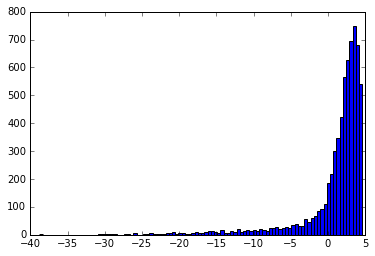

L -775761.51026
decorr 4.9859730337
L + tau R -780747.483294
Zeros 7398     0.66
46


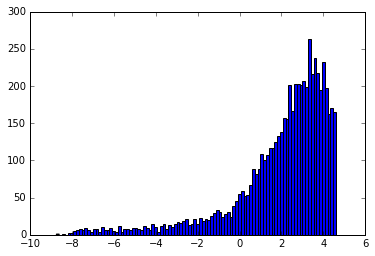

L -775683.066924
decorr 4.98595562222
L + tau R -780669.022547
Zeros 7017     0.63
47


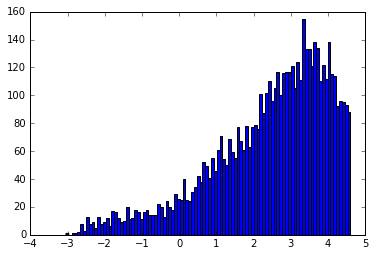

L -775643.722705
decorr 4.98587933084
L + tau R -780629.602036
Zeros 6662     0.6
48


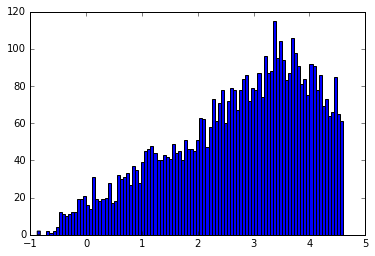

L -775842.278555
decorr 4.98574258046
L + tau R -780828.021136
Zeros 6328     0.57
49


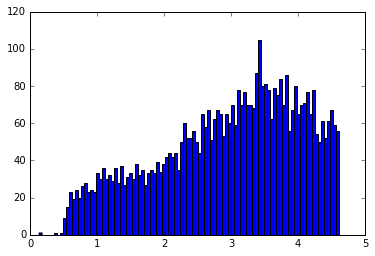

L -776319.735108
decorr 4.98560435629
L + tau R -781305.339465
Zeros 6011     0.54


In [234]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]


DECORR_TAU = 1e3

trivial_regularization = trivial_regularization
decorr_regularization = create_reg_decorr_unbiased(DECORR_TAU)

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 95
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:45] = trivial_regularization
regularizations_list[45:] = trivial_regularization
params_list[:45] = no_selection_params
params_list[45:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(DECORR_TAU),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

array([ 0.78583474,  0.72512648,  0.72804054])

In [ ]:
array([ 0.69983137,  0.66610455,  0.69087838])

array([ 0.69477234,  0.65430017,  0.68412162])

array([ 0.78246206,  0.72512648,  0.72972973])



In [ ]:
49
L -779670.397213
decorr 4.98731219952
L + tau R -784657.709413
Zeros 7117     0.64

In [175]:
for t in xrange(T):
    top = heapq.nlargest(20, range(W), key=lambda w: phi[t, w])
    print t
    for w in top:
        print '\t', '\t\t'.join(num_2_token[w].split('/')), phi[t, w]

0
	space		NN 0.0297035998546
	edu		NN 0.0241587911266
	com		NN 0.0140549684888
	nasa		NN 0.0102307645378
	program		NN 0.00973499876547
	information		NN 0.00934217453832
	available		JJ 0.00762263797324
	system		NN 0.00737630672214
	include		VB 0.00647557616006
	also		RB 0.00607285106743
	keyboard		NN 0.00588911184771
	center		NN 0.00577006482603
	shuttle		NN 0.0056842991822
	list		NN 0.0050686251806
	science		NN 0.00482320884167
	gov		NN 0.00476085171464
	bank		NN 0.00464957074177
	news		NN 0.0045194254546
	university		NN 0.00448590477405
	mail		NN 0.00440622486593
1
	health		NN 0.0158469054406
	disease		NN 0.0151632605908
	medical		JJ 0.0136282400908
	center		NN 0.0104703828031
	cancer		NN 0.0100275088669
	use		NN 0.00956738820501
	number		NN 0.00948663289283
	patient		NN 0.00934934749968
	year		NN 0.0091013442192
	research		NN 0.00892378442169
	child		NN 0.00851993044097
	study		NN 0.00815426467613
	april		NN 0.0077052333953
	aids		NN 0.0062002198088
	case		NN 0.00609772031446
	level	

In [176]:
import pandas
for t in xrange(T):
    top1 = heapq.nlargest(20, range(W), key=lambda w: phi[t, w])
    top2 = heapq.nlargest(20, range(W), key=lambda w: - gamma_wt[w, t])
    
    if np.random.random() > 0.5:
        t = top1
        top1 = top2
        top2 = t
        
    df = pandas.DataFrame({
            'first top': [
                num_2_token[w].split('/')[0]
                for w in top1
            ],
            'second top': [
                num_2_token[w].split('/')[0]
                for w in top2
            ]
        })
    print df
    print '\n\n'

      first top  second top
0         space         edu
1           edu        nasa
2           com         com
3          nasa       space
4       program         gov
5   information        pitt
6     available   intellect
7        system  skepticism
8       include         jxp
9          also    chastity
10     keyboard         geb
11       center       cadre
12      shuttle         dsl
13         list    shameful
14      science   surrender
15          gov          cs
16         bank         pub
17         news         ftp
18   university         gif
19         mail   anonymous



     first top  second top
0       health      cancer
1      disease      health
2      medical        aids
3       center     disease
4       cancer       child
5          use         use
6       number     medical
7      patient      number
8         year    clinical
9     research        page
10       child       april
11       study      report
12       april        year
13        aids      volume
14  